# Word2Vec

-Co-occurrence-based

-Mapping to semantic and syntactic space

-neural network

-CBOW bag of word(see left and right of word for predict context)

-Skip-gram(see middle word for predict context)

# Install Dataset
https://github.com/PyThaiNLP/classification-benchmarks

In [1]:
!wget https://www.dropbox.com/s/fsxepdka4l2pr45/prachathai-67k.zip; unzip prachathai-67k.zip

--2023-06-04 23:07:19--  https://www.dropbox.com/s/fsxepdka4l2pr45/prachathai-67k.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fsxepdka4l2pr45/prachathai-67k.zip [following]
--2023-06-04 23:07:19--  https://www.dropbox.com/s/raw/fsxepdka4l2pr45/prachathai-67k.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23ac01194ecbef53e75d595875.dl.dropboxusercontent.com/cd/0/inline/B9Y8C43DwWda3NN7NrH-RlFMA67xrtWVRGOEhe14IhHXST1tz5syud1lzDVX5ZN5lbZiRTw2azGiY85TfJ4LW39zMlok44_PkPhFu2ZaRtpv3Bf0y5WF2Nru56D9dQt9bF59loSK8nVmZ8mjX5wBJ1l4tCwl11RiWV6npnANdoQjmg/file# [following]
--2023-06-04 23:07:20--  https://uc23ac01194ecbef53e75d595875.dl.dropboxusercontent.com/cd/0/inline/B9Y8C43DwWda3NN7NrH-RlFMA67xrtWVRGOEhe14IhHXST1tz5syud1lzDV

In [2]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.3 MB/s eta 0:00:00


In [3]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Library

In [4]:
import pandas as pd

# word tokenize
from pythainlp.tokenize import word_tokenize

# gensim library to train word2vec
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# pre-processing

In [5]:
prachathai = pd.read_csv('prachathai-67k.csv')
# prachathai = prachathai[:1000]
print(prachathai.shape)
prachathai.head()

(67889, 5)


,url,date,title,body_text,labels
0,https://prachatai.com/print/42,2004-08-24 14:31,"นักวิจัยหนุน ""แม้ว"" เปิด ""จีเอ็มโอ""",ประชาไท --- 23 ส.ค.2547 นักวิจัยฯ ชี้นโยบายจี...,"['ข่าว', 'สิ่งแวดล้อม']"
1,https://prachatai.com/print/41,2004-08-24 14:22,ภาคประชาชนต้านเปิดเสรีจีเอ็มโอ,ประชาไท- 23 ส.ค.2547 นักวิชาการ ภาคประชาชน จ...,"['ข่าว', 'สิ่งแวดล้อม']"
2,https://prachatai.com/print/43,2004-08-24 15:17,จุฬาฯ ห่วงจีเอ็มโอลามข้าวไทย,นโยบายที่อนุญาตให้ปลูกร่วมกับพืชอื่นได้นั้นถื...,"['ข่าว', 'สิ่งแวดล้อม']"
3,https://prachatai.com/print/45,2004-08-24 15:58,ฟองสบู่การเมืองแตก ทักษิณหมดกึ๋น ชนชั้นกลางหมด...,ประชาไท -- 23 ส.ค. 47 ขาประจำทักษิณ ฟันธง ฟอง...,"['ข่าว', 'การเมือง', 'คณะเศรษฐศาสตร์ มหาวิทยาล..."
4,https://prachatai.com/print/47,2004-08-24 16:10,กอต.เสนอเลิกถนนคลองลาน-อุ้มผาง,ประชาไท-23 ส.ค.47 คณะกรรมการอนุรักษ์ ผืนป่าตะ...,"['ข่าว', 'สิ่งแวดล้อม']"


In [6]:
# word tokenize in body text columns
sentences = [word_tokenize(text, engine='newmm') for text in prachathai['body_text'].tolist()]
# sentences

In [7]:
# sentences[20]

In [8]:
print(sentences[0:2])

[['ประชา', 'ไท', ' ', '---', ' ', '23', ' ', 'ส.ค.', '2547', '  ', 'นักวิจัย', 'ฯ', ' ', 'ชี้', 'นโยบาย', 'จีเอ็มโอ', 'เอื้อ', 'ต่อ', 'การค้นคว้าวิจัย', ' ', 'แต่', 'ไม่', 'ใช่', 'คำตอบ', 'ทั้งหมด', ' ', 'ขณะที่', 'ผอ.', 'สวทช.', 'ระบุ', 'มาตรการ', 'ตรวจสอบ', 'ความปลอดภัย', 'มี', 'มา', 'ก่อน', 'การ', 'กำหนด', 'นโยบาย', 'ของ', 'รัฐบาล', ' ', 'เพียงแต่', 'ทบทวน', 'และ', 'ปรับปรุง', 'เพิ่มเติม', '  ', '\n', 'สำนักงาน', 'พัฒนา', 'วิทยาศาสตร์', 'และ', 'เทคโนโลยี', '  ', 'จัด', 'สัมมนา', 'เกี่ยวกับ', 'มะละกอ', 'ดัดแปลง', 'พันธุกรรม', 'ในประเทศ', 'ไทย', ' ', 'มี', 'นักวิชาการ', ' ', 'นักวิจัย', 'จาก', 'กรมวิชาการเกษตร', '  ', 'มหาวิทยาลัยเกษตรศาสตร์', '  ', 'และ', 'มหาวิทยาลัยมหิดล', 'เข้าร่วม', '  ', 'โดย', 'มี', 'การ', 'นำเสนอ', 'ผลการศึกษา', 'ทดลอง', 'ที่ผ่านมา', '  ', 'ซึ่ง', 'พบ', 'ว่า', 'มะละกอ', '\n', 'จีเอ็มโอ', 'ผ่านการทดสอบ', 'ความปลอดภัย', 'ทาง', 'ชีวภาพ', 'สิ่งแวดล้อม', 'และ', 'อาหาร', 'ระดับ', 'หนึ่ง', 'เท่านั้น', '    ', '\n', ' ', '"', 'การค้นคว้าวิจัย', 'มะละกอ', 'จีเอ็มโอ', '

In [9]:
# set parameter for training word2vec
num_workers = 2 # number of threads to run in parallel
downsampling = 1e-3 # the threashold for configuration
num_feature = 100 # dimensionnality of word vectors
min_word_count = 10 # Ignores all words with total frequency lower than this
context = 8 #Maximum distance between the current and predicted word within sentence
modelname = 'word2vec_gensim'

# train model

In [10]:
#train word2vec by gensim library
w2v = word2vec.Word2Vec(workers=num_workers, max_vocab_size = None, vector_size=num_feature,
                        min_count=min_word_count, window=context, sample=downsampling)

In [11]:
# build vocab
w2v.build_vocab(sentences)

In [12]:
w2v.train(sentences, total_examples=w2v.corpus_count,epochs=10)

(678872823, 936032220)

In [13]:
# most similar in car
WORD = "รถ"
w2v.wv.most_similar(WORD, topn=20)

[('รถตู้', 0.8519425392150879),
 ('รถสิบล้อ', 0.8352022767066956),
 ('รถกระบะ', 0.8313007950782776),
 ('กระบะ', 0.8051110506057739),
 ('รถยนต์', 0.8045070171356201),
 ('รถบรรทุก', 0.8000421524047852),
 ('รถจักรยาน', 0.7940531969070435),
 ('รถบัส', 0.7884988188743591),
 ('รถพ่วง', 0.7802101969718933),
 ('รถมอเตอร์ไซค์', 0.7763062715530396),
 ('รถจักรยานยนต์', 0.7736167907714844),
 ('จักรยานยนต์', 0.7689968347549438),
 ('รถเก๋ง', 0.7680482268333435),
 ('รถทัวร์', 0.7567201256752014),
 ('ขบวนรถ', 0.7540234327316284),
 ('รถบ้าน', 0.735013484954834),
 ('มอเตอร์ไซค์', 0.7344854474067688),
 ('ขับรถ', 0.733430802822113),
 ('รถประจำทาง', 0.7332037687301636),
 ('คนขับรถ', 0.7315282225608826)]

In [14]:
# most similar in when
WORD = "เมื่อไหร่"
w2v.wv.most_similar(WORD, topn=20)

[('เมื่อไร', 0.9316778779029846),
 ('เมื่อใด', 0.7186588048934937),
 ('หรือยัง', 0.6868646144866943),
 ('สักที', 0.654786229133606),
 ('ไหม', 0.6531206369400024),
 ('วันใด', 0.6517402529716492),
 ('ยังไง', 0.6508159041404724),
 ('เดี๋ยว', 0.6289472579956055),
 ('อยู่ดีๆ', 0.6272210478782654),
 ('ที่ไหน', 0.6262170076370239),
 ('หรือเปล่า', 0.6048212647438049),
 ('ไง', 0.6022383570671082),
 ('วันหนึ่ง', 0.5844411253929138),
 ('เถอะ', 0.580348551273346),
 ('สักวันหนึ่ง', 0.5775191783905029),
 ('อีกหน่อย', 0.5753588080406189),
 ('ถ้า', 0.5718795657157898),
 ('ไม่เป็นไร', 0.5704551339149475),
 ('เสียที', 0.5646176934242249),
 ('ตรงไหน', 0.5616974234580994)]

In [15]:
# most similar in dive water
WORD = "ดำน้ำ"
w2v.wv.most_similar(WORD, topn=20)

[('ว่ายน้ำ', 0.6343032121658325),
 ('วาฬ', 0.6120507121086121),
 ('วางไข่', 0.6092914342880249),
 ('นักประดาน้ำ', 0.5991180539131165),
 ('ไต่เขา', 0.5957709550857544),
 ('ข่าวท้องถิ่น', 0.5913652181625366),
 ('เดินเรือ', 0.5913007259368896),
 ('ปลาโลมา', 0.5753018856048584),
 ('ฉลาม', 0.5743399262428284),
 ('สมุทรศาสตร์', 0.5662392973899841),
 ('ล่องเรือ', 0.5642807483673096),
 ('ใช้เรือ', 0.5540268421173096),
 ('ลูกปลา', 0.5519119501113892),
 ('ตื้น', 0.5445321202278137),
 ('กรีฑา', 0.5443919897079468),
 ('กู้ภัย', 0.5400195121765137),
 ('โขดหิน', 0.5337468981742859),
 ('เรือหางยาว', 0.5320730209350586),
 ('เดินป่า', 0.5304851531982422),
 ('มายากล', 0.5280569195747375)]

In [16]:
WORD = "แม้ว"
w2v.wv.most_similar(WORD, topn=20)

[('แอ้ด', 0.7340074181556702),
 ('ลั่น', 0.7201820611953735),
 ('เหลิม', 0.7150372862815857),
 ('มท.1', 0.7036933898925781),
 ('มาร์ค', 0.6990175843238831),
 ('แฉ', 0.6981274485588074),
 ('บิ๊ก', 0.6968709826469421),
 ('รบ.', 0.6828237175941467),
 ('ปูด', 0.6784453392028809),
 ('ปชป.', 0.6756200790405273),
 ('จวก', 0.6755738854408264),
 ('"กษิต"', 0.6708440780639648),
 ("'\xa0", 0.6707964539527893),
 ('เพียบ', 0.6659766435623169),
 ('เลี้ยบ', 0.6577944159507751),
 ('ทรท.', 0.6516190767288208),
 ("\xa0'", 0.6485154032707214),
 ('ฉุน', 0.6462859511375427),
 ('เมิน', 0.6448039412498474),
 ('ปชช.', 0.6422842144966125)]

In [17]:
WORD = "ทักษิณ"
w2v.wv.most_similar(WORD, topn=20)

[('ษิน', 0.6216428875923157),
 ('อภิสิทธิ์', 0.6040908098220825),
 ('อำมาตย์', 0.5878890752792358),
 ('ชินวัตร', 0.5789569020271301),
 ('เนวิน', 0.5758250951766968),
 ('อำมาตยาธิปไตย', 0.5687885284423828),
 ('บรรหาร', 0.5612752437591553),
 ('ประชาธิปัตย์', 0.5558758974075317),
 ('ลักษณ์', 0.5544158220291138),
 ('หุ่นเชิด', 0.5531985759735107),
 ('ลิ่วล้อ', 0.5527777671813965),
 ('เผด็จการ', 0.543726921081543),
 ('รัฐประหาร', 0.5311477780342102),
 ('พรรคพวก', 0.5236615538597107),
 ('สุรทิน', 0.5212067365646362),
 ('อมาตยาธิปไตย', 0.5195275545120239),
 ('ทรราช', 0.5135364532470703),
 ('ไวพจน์', 0.49620145559310913),
 ('สนธิ', 0.4925714135169983),
 ('นายใหญ่', 0.49241235852241516)]

In [18]:
WORD = "นักข่าว"
w2v.wv.most_similar(WORD, topn=20)

[('ช่างภาพ', 0.7608583569526672),
 ('บล็อกเกอร์', 0.6485006213188171),
 ('เดอะเนชั่น', 0.6395565867424011),
 ('บีบีซี', 0.6376057267189026),
 ('สื่อมวลชน', 0.631715714931488),
 ('ผู้สื่อข่าว', 0.629971981048584),
 ('ผู้ประกาศข่าว', 0.6253317594528198),
 ('คอลัมนิสต์', 0.6180019974708557),
 ('ผู้รายงานข่าว', 0.6145067811012268),
 ('เทเลกราฟ', 0.5924899578094482),
 ('Gothamist', 0.5916848182678223),
 ('ซีเอ็นเอ็น', 0.5887845754623413),
 ('สื่อ', 0.5774299502372742),
 ('ข่าว', 0.5713387727737427),
 ('ThaiPBS', 0.5711080431938171),
 ('เดอะสตาร์', 0.5653430819511414),
 ('อัลจาซีรา', 0.5644302368164062),
 ('หนังสือพิมพ์', 0.5576898455619812),
 ('ข่าวกีฬา', 0.5493791699409485),
 ('CNN', 0.5424834489822388)]

# visualization

In [19]:
word = "นักข่าว"
he = w2v.wv.most_similar(word, topn=20)
x = [w[0] for w in he]
x.append(word)

In [20]:
# find id for map id and word
labels = w2v.wv.index_to_key

In [21]:
# reduce 100 dimension to 2-3 dimension
from sklearn.manifold import TSNE
tsne = TSNE(perplexity = 30.0, n_components=2, init='pca', n_iter=5000)
thai2plot = tsne.fit_transform(w2v.wv.vectors)

In [22]:
!wget -O THSarabunNew.ttf https://github.com/themesanasang/car/blob/master/assets/fonts/THSarabunNew.ttf?raw=true

--2023-06-05 01:19:53--  https://github.com/themesanasang/car/blob/master/assets/fonts/THSarabunNew.ttf?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/themesanasang/car/raw/master/assets/fonts/THSarabunNew.ttf [following]
--2023-06-05 01:19:54--  https://github.com/themesanasang/car/raw/master/assets/fonts/THSarabunNew.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/themesanasang/car/master/assets/fonts/THSarabunNew.ttf [following]
--2023-06-05 01:19:54--  https://raw.githubusercontent.com/themesanasang/car/master/assets/fonts/THSarabunNew.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [23]:
# split word and prepare for plot in index and vector
sample_idx=[]
for word in x:
  sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]

In [24]:
# library for plot and font THSarabunNew
def plot_with_labels(low_dim_embs,labels,filename,figsize=(10,10)):
  assert low_dim_embs.shape[0] >= len(labels), "More labels than embedding"
  plt.figure(figsize=figsize) # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x,y)
    prop = font_manager.FontProperties(fname=f'THSarabunNew.ttf',size=20)
    plt.annotate(label,
                 fontproperties=prop,
                 xy=(x,y),
                 xytext=(5,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)

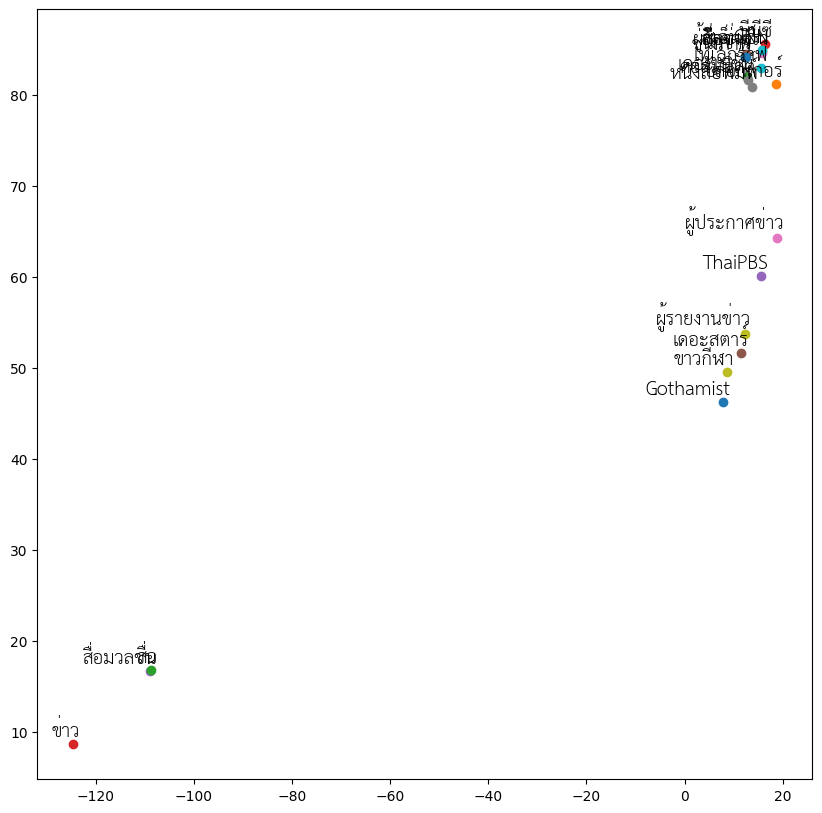

In [25]:
# visualization 2 dimension
plot_with_labels(sample_plot,x,'cute.png')

In [28]:
word = "ฟุตบอล"
he = w2v.wv.most_similar(word, topn=20)
he

[('บอล', 0.7996475100517273),
 ('นักเตะ', 0.7544628381729126),
 ('คัพ', 0.7462494373321533),
 ('พรีเมียร์', 0.7291528582572937),
 ('กีฬา', 0.7228096127510071),
 ('ลีก', 0.7198165655136108),
 ('โอลิมปิค', 0.7197448015213013),
 ('นักกีฬา', 0.7193228602409363),
 ('ลูกหนัง', 0.7080925107002258),
 ('แชมป์โลก', 0.7079865336418152),
 ('โอลิมปิก', 0.7005689144134521),
 ('แมนเชสเตอร์ยูไนเต็ด', 0.6993213295936584),
 ('ฟีฟ่า', 0.6986386179924011),
 ('ซีเกมส์', 0.6933014392852783),
 ('ผลการแข่งขัน', 0.6873403191566467),
 ('ชิงชนะเลิศ', 0.6837382912635803),
 ('เทนนิส', 0.681094765663147),
 ('NBA', 0.6723166704177856),
 ('E-Sport', 0.6696816086769104),
 ('ยกน้ำหนัก', 0.6663200855255127)]

In [29]:
x = [w[0] for w in he]
x.append(word)

In [30]:
sample_idx=[]
for word in x:
  sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]

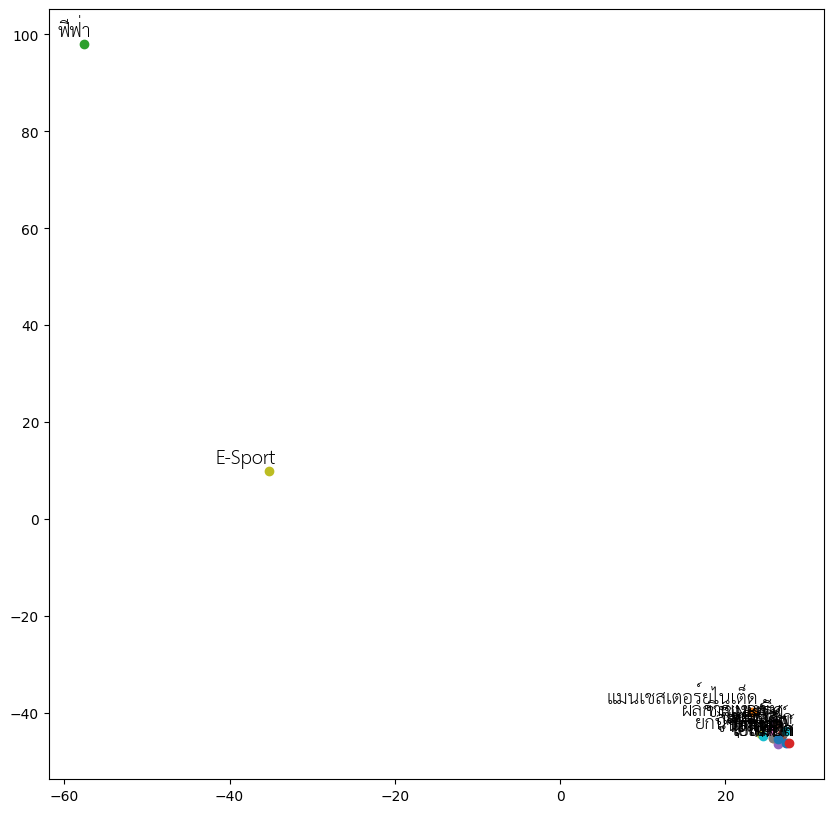

In [31]:
plot_with_labels(sample_plot,x,'cute.png')

# how much similar score in 2 word

In [32]:
w2v.wv.similarity('ข่าว','ทักษิณ')

0.050374936

In [33]:
w2v.wv.similarity('ฟุตบอล','แม้ว')

0.08211073

In [34]:
w2v.wv.similarity('ฟุตบอล','มือถือ')

0.17340298

In [35]:
w2v.wv.similarity('ฟุตบอล','โค้ช')

0.59210336

In [37]:
word='ลำไย'
he = w2v.wv.most_similar(word, topn=20)
he

[('ข้าว', 0.7636958956718445),
 ('กระเทียม', 0.7620234489440918),
 ('หอมแดง', 0.7351674437522888),
 ('ข้าวเปลือก', 0.725113034248352),
 ('ยางพารา', 0.7247626185417175),
 ('มันสำปะหลัง', 0.708683967590332),
 ('ทุเรียน', 0.707260251045227),
 ('ข้าวโพด', 0.7067345976829529),
 ('ข้าวนึ่ง', 0.7048556804656982),
 ('อ้อย', 0.6948114633560181),
 ('ข้าวนาปรัง', 0.6913819313049316),
 ('น้ำยาง', 0.6899319291114807),
 ('ลิ้นจี่', 0.6618770956993103),
 ('ล้นตลาด', 0.657615602016449),
 ('ยาง', 0.6520096063613892),
 ('ข้าวใหม่', 0.6514655947685242),
 ('มังคุด', 0.6446107029914856),
 ('น้ำตาลทราย', 0.6408200263977051),
 ('ไข่ไก่', 0.6382516622543335),
 ('ข้าวเก่า', 0.6365020275115967)]

In [38]:
x = [w[0] for w in he]
x.append(word)

In [39]:
sample_idx=[]
for word in x:
  sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]

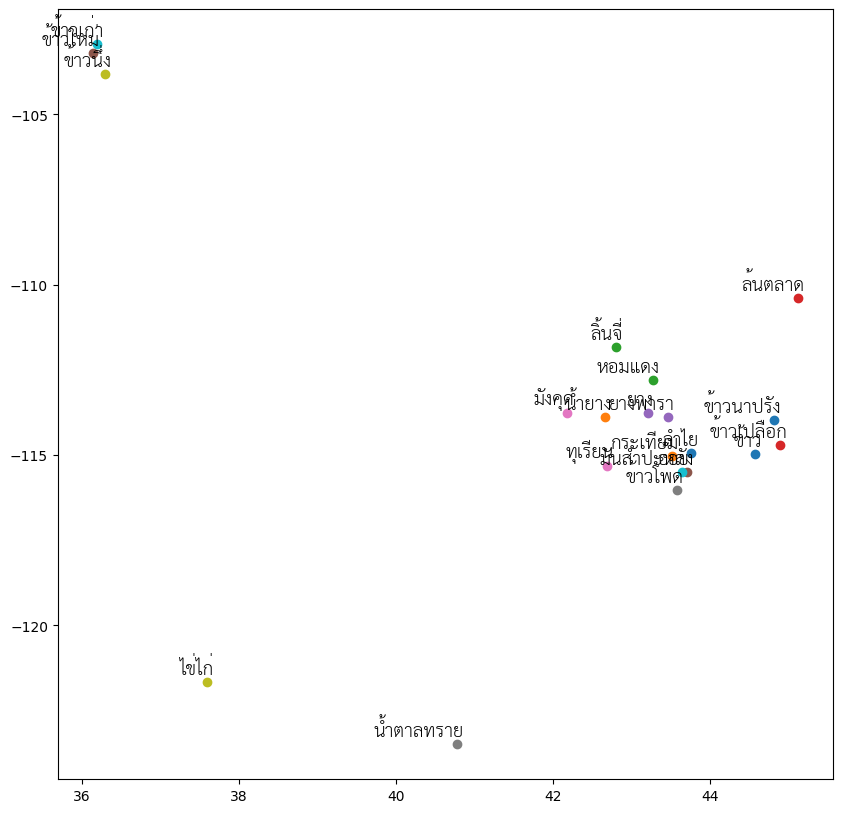

In [40]:
plot_with_labels(sample_plot,x,'cute.png')